# Проект: Выделение перспективных групп пользователей мобильного приложения "Ненужные вещи" на основе поведения

## Материалы
*[Презентация](https://disk.yandex.ru/i/s8JSnDvXx99FrQ)


*[Дашборд](https://public.tableau.com/views/Zhandarova_dashboard_veschi/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link)

**Цель:** Сегментирование пользователей приложения на основе метрик для выявления целевой и смежной групп.

**Задачи:**

1. Исследовать поведение пользователей приложения на основе метрик:

   - удержание;
   
   - время, проведённое в приложении;
   
   - частота действий;
   
   - конверсия в целевое действие — просмотр контактов.
   
   
2. Выделить группы пользователей на основе произведенных действий.

3. Проанализировать удержание и конверсию в выделенных группах.

4. Сравнить конверсию пользователей, пришедших из разных источников.

5. Сравнить доли покупателей (совершивших действие contacts_show), среди просматривающих рекомендации и среди непросматривающих.   

**План**

1. Ознакомление с данными (загрузка, общая информация, количество записей, пропусков, типы данных);


2. Предобработка данных;

   2.1 Обработка пропусков;
   
   2.2 Обработка дубликатов (явных и неявных);
   
   2.3 Типы данных;
   
   2.4 Приведение название столбцов в соответствие с общепринятым стилем;
   
   
3. Исследовательский анализ общего поведения пользователей по следующим метрикам;

   3.1 удержание пользователей;  
   
   3.2 время, проведенное в приложении;
   
   3.3 частота действий пользователей;
   
   3.4 конверсия в целевое действие (просмотр контактов)
   
   
4. Сегментация пользователей на основе проанализированных метрик;

   4.1 анализ удержания для каждой группы;
   
   4.2 анализ конверсии для каждой группы.

5. Проверка гипотез

   5.1 Гипотеза 1
   Пользователи, установившие приложение по ссылке из yandex и
   пользователи, установившие приложение по ссылке из google, демонстрируют 
   разную конверсию в просмотры контактов. 
   
   5.2 Гипотеза 2
   Есть различия в долях покупок (contacts_show) среди пользователей, регулярно просматривающих рекомендованное и    непросматривающих, то есть те, кто регулярно просматривают рекомендованное совершают меньшее количество       покупок, а те, кто не просматривают рекомендованное, совершают больше покупок.
    
    
6. Выводы и рекомендации.

## Ознакомление с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from plotly import graph_objects as go
from scipy import stats as st
import numpy as np
import math as mth

In [2]:
mobile = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')
source = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
display(mobile)
display(source)

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9


,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
...,...,...
4288,b86fe56e-f2de-4f8a-b192-cd89a37ecd41,yandex
4289,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,yandex
4290,437a4cd4-9ba9-457f-8614-d142bc48fbeb,yandex
4291,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex


In [3]:
display(mobile.info())
display(source.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


None

## Предобработка данных

### Названия колонок

In [4]:
# Переименуем колонки в соответствии с общепринятым стилем
mobile.columns = ['event_time', 'event_name', 'user_id'] 
source.columns = ['user_id', 'source']

### Тип данных

In [5]:
#  Поменяем тип данных и округлим до секунд
mobile['event_time'] = pd.to_datetime(mobile['event_time']).dt.round('1s')
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


### Обработка пропусков

In [6]:
mobile.isna().sum()
source.isna().sum()

user_id    0
source     0
dtype: int64

Пропуски отстутствуют.

### Обработка явных дубликатов

In [7]:
mobile.duplicated().sum()
source.duplicated().sum()

0

Явных дубликатов нет.

### Обработка неявных дубликатов

In [8]:
# Посмотрим, из каких источников пришли пользователи в нашем датасете
source.groupby('source').count()

,user_id
source,
google,1129
other,1230
yandex,1934


Выглядят ок, 3 источника.

In [9]:
# Посмотрим, какие события есть в нашем датасете.
mobile.groupby('event_name')['user_id'].count()

event_name
advert_open       6164
contacts_call      541
contacts_show     4450
favorites_add     1417
map               3881
photos_show      10012
search_1          3506
search_2           324
search_3           522
search_4           701
search_5          1049
search_6           460
search_7           222
show_contacts       79
tips_click         814
tips_show        40055
Name: user_id, dtype: int64

У нас есть 7 событий из категории search. Так как у нас нет данных  чем они отличаются, нет возможности понять отличия, также как у нас нет необходимости как-то дифференцировать варианты поиска товаров в приложении, мы объединим их в одну категорию. Аналогично мы поступим с событиями show_contacts и contacts_show, которые выглядят как одно и то же событие.

In [10]:
mobile = mobile.replace({'event_name':{'search_1' : 'search', 'search_2' : 'search', 'search_3' : 'search',
                                       'search_4' : 'search', 'search_5' : 'search', 'search_6' : 'search', 
                                       'search_7' : 'search', 'show_contacts' : 'contacts_show'}}) 
mobile.groupby('event_name')['user_id'].count()

event_name
advert_open       6164
contacts_call      541
contacts_show     4529
favorites_add     1417
map               3881
photos_show      10012
search            6784
tips_click         814
tips_show        40055
Name: user_id, dtype: int64

### Промежуточный вывод

У нас в работе 2 датасета с данными из Приложения "Ненужные вещи", содержащие: историю событий Пользователей с указанием типа события, времени события и уникальный id Пользователя; второй датасет содержит информацию об источнике привлечения Пользователя и уникальный id Пользователя. Датасеты  без пропусков и явных дубликатов. Нами была произведена обработка данных: мы удалили неявные дубликаты в виде дублирующих событий, поменяли типы данных для возмоэности корректно работать колонкой, содержащей данные по времени событий.

##  Исследовательский анализ данных

### Источники привлечения пользователей

Посмотрим, за какой период у нас данные.

In [11]:
print('Начало:', (mobile['event_time'].min()))
print('Окончание:', (mobile['event_time'].max()))

Начало: 2019-10-07 00:00:00
Окончание: 2019-11-03 23:58:13


Мы имеем данные почти за календарный месяц.

In [12]:
# Для удобства объединим файлы
sessions = mobile.merge(source, right_on='user_id', left_on='user_id')
sessions['day_event'] = sessions['event_time'].dt.day_name()
sessions

,event_time,event_name,user_id,source,day_event
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday
3,2019-10-07 00:01:28,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday
4,2019-10-07 00:01:35,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday
...,...,...,...,...,...
74192,2019-11-03 23:46:47,map,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday
74193,2019-11-03 23:46:59,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday
74194,2019-11-03 23:47:01,tips_show,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday
74195,2019-11-03 23:47:47,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday


In [13]:
print('Количество уникальных пользователей:', len(sessions['user_id'].unique()))

Количество уникальных пользователей: 4293


In [14]:
# Создадим профили пользователей, где укажем первую сессию с указанием источника
profiles = (
    sessions.sort_values(by=['user_id', 'event_time'])
    .groupby('user_id')
    .agg({'event_time': 'first', 'source': 'first'})
    .rename(columns={'event_time': 'first_ts'})
    .reset_index()
)
profiles['dt'] = profiles['first_ts'].dt.date
profiles['day'] = profiles['first_ts'].dt.day_name() # Добавим дни недели для анализа поведения пользователей по дням недели

profiles

,user_id,first_ts,source,dt,day
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:46,other,2019-10-07,Monday
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:34,yandex,2019-10-19,Saturday
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35,yandex,2019-11-01,Friday
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:06,google,2019-10-18,Friday
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41,yandex,2019-10-25,Friday
...,...,...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2019-10-13 16:11:27,yandex,2019-10-13,Sunday
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07 20:32:50,yandex,2019-10-07,Monday
4290,ffcf50d9-293c-4254-8243-4890b030b238,2019-10-23 11:51:35,google,2019-10-23,Wednesday
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-21 16:39:34,yandex,2019-10-21,Monday


In [15]:
# Посмотрим, как привлекаются пользователи.
profiles.groupby('source').agg({'user_id': 'nunique'}).reset_index()

,source,user_id
0,google,1129
1,other,1230
2,yandex,1934


45% пользователей приходят по ссылке из Яндекса, 26% из гугла, и оставшиеся 29% из оставшихся источников.

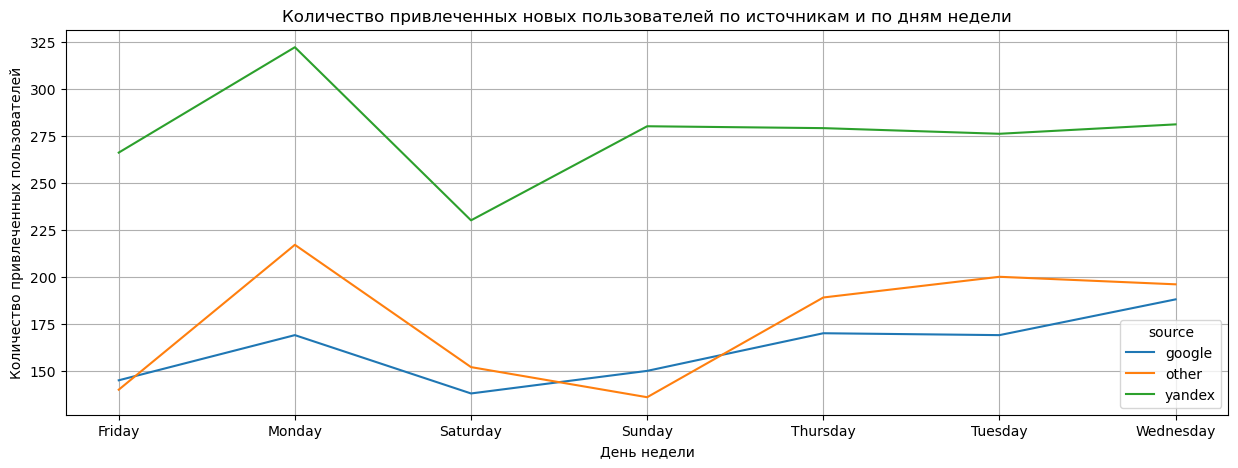

In [16]:
profiles.pivot_table(
    index='day',  # даты первых посещений
    columns='source',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)
plt.ylabel('Количество привлеченных пользователей')
plt.xlabel('День недели')
plt.title('Количество привлеченных новых пользователей по источникам и по дням недели')
plt.show()

Больше всего пользователей приходит из источника Яндекс,  Гугл и "остальные" примерно поровну. По дням недели из всех источников больше всего приходит людей в Понедельник, вероятно, "новая жизнь" с новыми вещами у большинства начинается с понедельника.  Меньше всего новых пользователей пришло в Пятницу, Субботу и Воскресенье. Новые пользователи активнее приходят в будние дни.

Посмотрим, на какие дни приходится пик наплыва новых пользователей в независимости от источника, чтобы в дальнейшем посмотреть, как меняется поведение пользователей в зависимости от дня прихода.

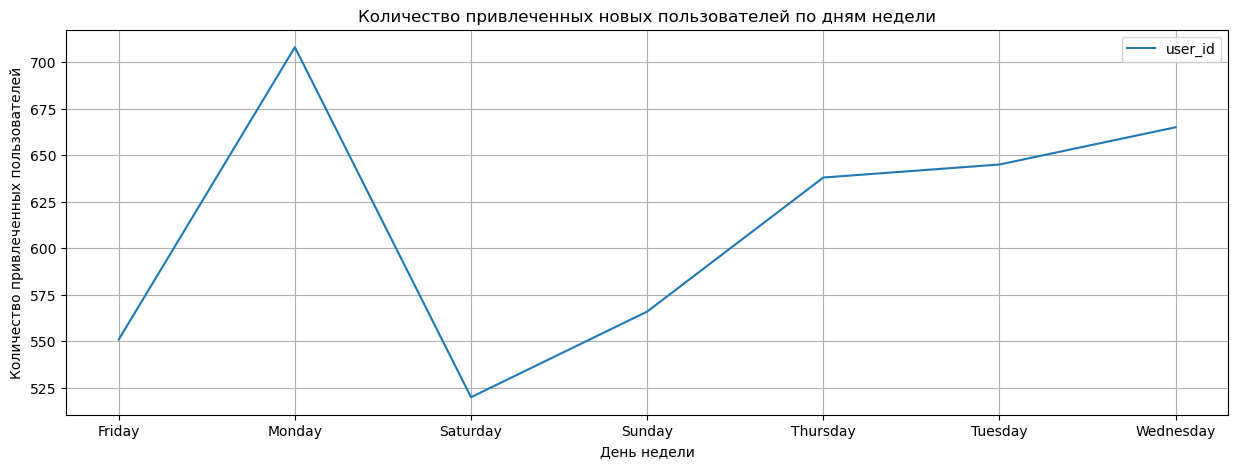

In [17]:
profiles.pivot_table(
    index='day',  # даты первых посещений
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)
plt.ylabel('Количество привлеченных пользователей')
plt.xlabel('День недели')
plt.title('Количество привлеченных новых пользователей по дням недели')
plt.show()

В целом больше всего новых пользователей приходит в Понедельник, меньше всего в Субботу. Четверг второй день по количеству новых привлеченных пользователей. Необходимо учесть эту информацию при анализе удержания пользователей.

### Retention rate

In [18]:
def get_retention(
    profiles, mobile, observation_date, horizon_days, dimensions=[]
):

    # исключаем пользователей, не «доживших» до горизонта анализа

    last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        mobile, on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_time'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=dimensions, columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (
        result_raw.groupby(dimensions)
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped

Горизонт анализа мы выбрали в 10 дней, так как именно к концу этого периода активность начинала снижаться. В период с 7 по 10 день все еще наблюдаются скачки активности старых пользователей. 

In [19]:
retention_raw, retention = get_retention(
    profiles, sessions, datetime(2019, 11, 3).date(), 10, dimensions=['dt']
)

retention

,cohort_size,0,1,2,3,4,5,6,7,8,9
dt,,,,,,,,,,,
2019-10-07,204,1.0,0.122549,0.098039,0.107843,0.053922,0.039216,0.058824,0.078431,0.053922,0.049020
2019-10-08,167,1.0,0.161677,0.125749,0.053892,0.041916,0.065868,0.053892,0.071856,0.059880,0.041916
2019-10-09,176,1.0,0.073864,0.062500,0.056818,0.068182,0.068182,0.056818,0.073864,0.062500,0.034091
2019-10-10,174,1.0,0.091954,0.103448,0.080460,0.097701,0.080460,0.068966,0.051724,0.080460,0.034483
2019-10-11,136,1.0,0.088235,0.117647,0.095588,0.088235,0.073529,0.073529,0.044118,0.014706,0.044118
2019-10-12,125,1.0,0.128000,0.160000,0.056000,0.064000,0.088000,0.080000,0.088000,0.080000,0.064000
2019-10-13,148,1.0,0.128378,0.067568,0.054054,0.067568,0.054054,0.054054,0.047297,0.047297,0.047297
2019-10-14,185,1.0,0.113514,0.102703,0.102703,0.081081,0.070270,0.054054,0.043243,0.075676,0.037838
2019-10-15,186,1.0,0.139785,0.091398,0.080645,0.053763,0.053763,0.080645,0.075269,0.064516,0.021505


Построим тепловую карту удержания.

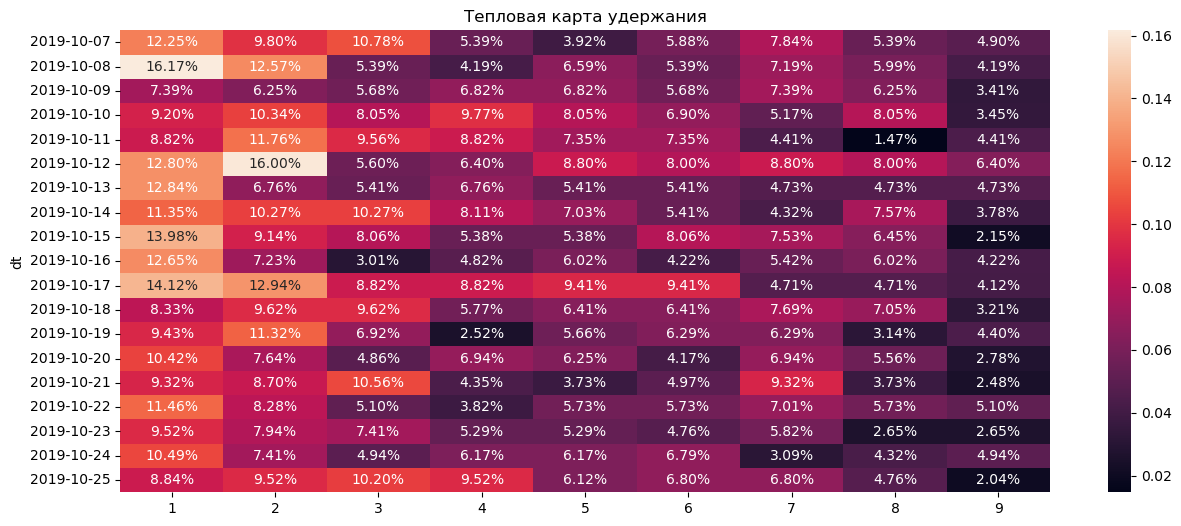

In [20]:
plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(
    retention.drop(columns=['cohort_size', 0]),  # удаляем размеры когорт
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания')  # название графика
plt.show()

Необходимо отметить наибольший показатель удержания пользователей в течение первых 3-4 дней, в течение следующих 3-4 дней показатель несколько снижается, но незначительно, мы наблюдаем не только одинаковые показатели удержания в течение нескольких дней, но и рост показателя в некоторых случаях. Снижаться показатель удержания начинает ближе к 10-му дню. Это говорит о том, что пользователи достаточно активно пользуются приложением в течеие 9-10 дней с момента прихода, вероятно пока не совершат необходимую покупку.

Ранее мы увидели, что пик новых приходящих пользователей из всех источников приходится на Понедельник и меньше всего на Субботу. Посмотрим, отличается ли удержание пользователей, в зависимости от того, в какой день они пришли.

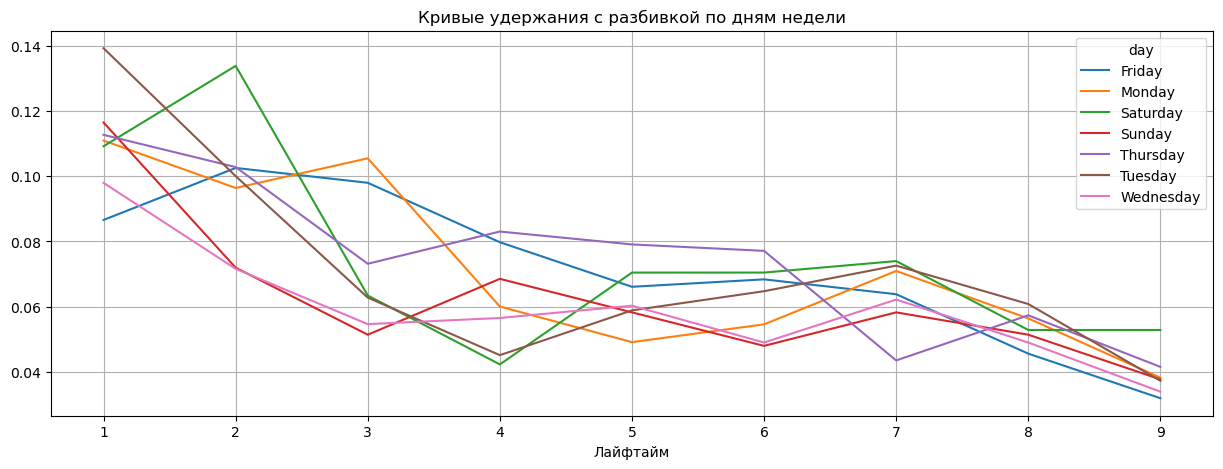

In [21]:
# рассчитываем удержание с учётом дня недели

retention_raw, retention = get_retention(
    profiles, mobile, datetime(2019, 11, 3).date(), 10, dimensions=['day']
)  # передаём параметру dimensions столбец день недели

report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по дням недели')
plt.show()

На 10-дневном лайфтайме мы видим, что лучше всего удержание у пользователей, пришедших в Субботу. При этом мы помним, что в субботу в приложение приходит меньше всего новых пользователей, субботние пользователи демонстрируют максимальное удержание на 10 день. Худшее удержание на 10-й день у пятничных пользователей и пользователей, пришедших в среду. Пользователи, пришедшие в Четверг, также демонстрируют неплохое удержание как на 10-й день, так и в промежутке до 10. В целом мы видим, что в харакетрном поведении пользователей есть 2 пика: в субботу, вероятно, люди хотят решить вопрос за выходные и в четверг, которые также планируют решать вопрос за выходные, но подходят к нему несколько заранее. Это логичное поведение, когда люди планируют закончить дело, совершить покупку (съездить посмотреть, забрать) в течение выходных. Это можно использовать при планировании рекламных акций. 

Посмотрим, какие источники привлекают пользователей с наилучшим удержанием.

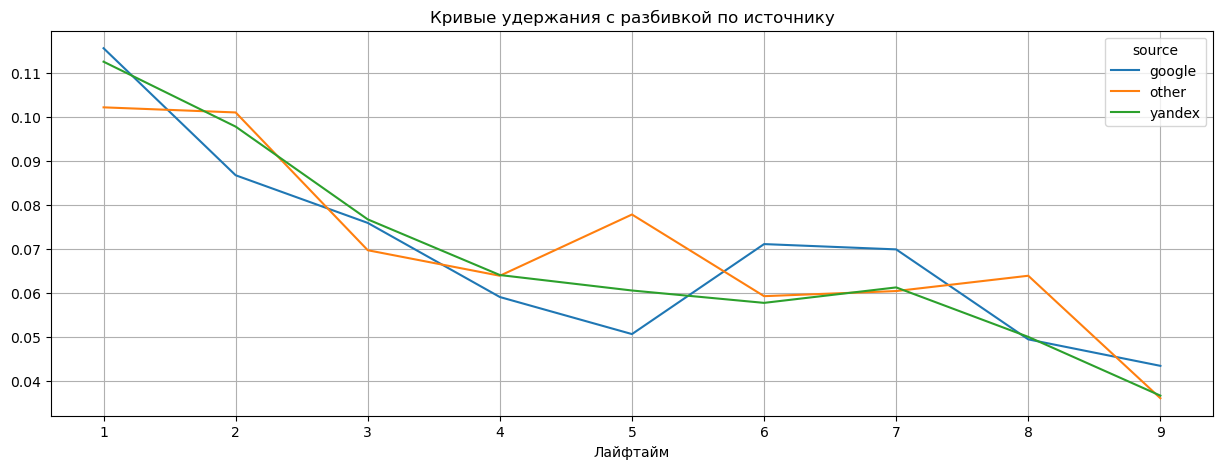

In [22]:
# рассчитываем удержание с учётом источника

retention_raw, retention = get_retention(
    profiles, mobile, datetime(2019, 11, 3).date(), 10, dimensions=['source']
)  # передаём параметру dimensions столбец источник привлечения пользователей

report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по источнику')
plt.show()

Пользователи, пришедшие из разных источников демонстрируют разное поведение: пользователи из гугла наименее активны на 5-й день, в то время, как пользователи из других источников на 5-ый день активнее, чем в другие. Пользователи из гугл демонстрируют лучшие показатели на 10-й день.

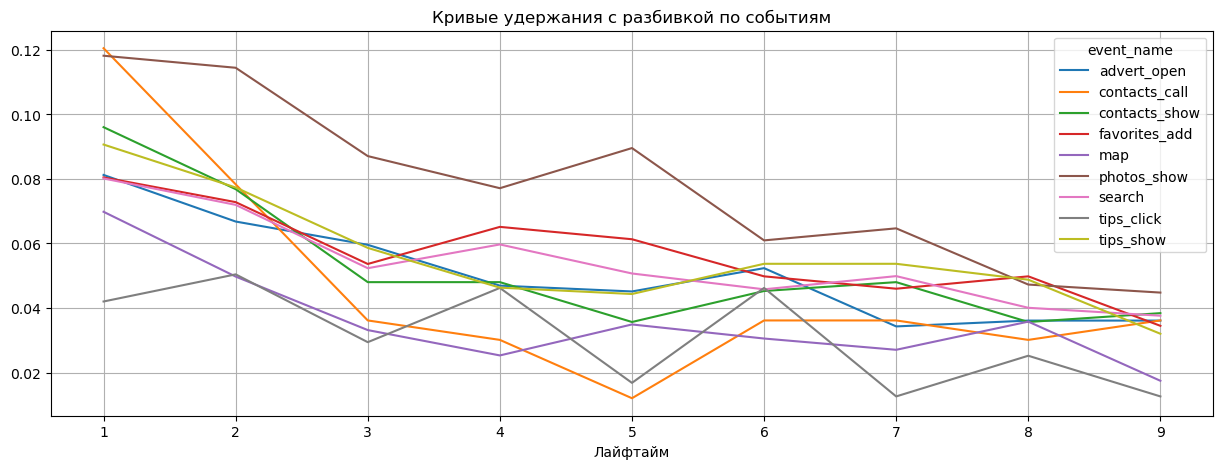

In [23]:
# рассчитываем удержание с учётом события

retention_raw, retention = get_retention(
    profiles, mobile, datetime(2019, 11, 3).date(), 10, dimensions=['event_name']
)  # передаём параметру dimensions столбец с событием

report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по событиям')
plt.show()

Больше всего в первые дни пользователи смотрят фото и совершают звонки. К 5-му дню количество звонков минимизируется, но увеличивается к 10-му. Просмотр фотографий очень незначительно падает относительно других событий. Пользователи также активно добавляют объявления в избранное на протяжении всего 10-дневного лайфтайма. Просмотр фотографий, поиск и добавление в избранное - самые характерные события и показывающие лучшую динамику удержания. 

### Время, проведенное в приложении

#### Длительность сессий

In [24]:
g = (sessions.groupby('user_id')['event_time'].diff() > pd.Timedelta('30Min')).cumsum()
sessions['session_id'] = sessions.groupby(['user_id', g], sort=False).ngroup() + 1
sessions['prev'] = sessions.groupby('user_id')['event_time'].shift()
#sessions['prev'].fillna(0, inplace=True)
sessions['session_time'] = (sessions['event_time'] - sessions['prev']).dt.seconds
sessions['prev'].fillna(0, inplace=True)
sessions['session_time'].fillna(0, inplace=True)
sessions['st'] = sessions.groupby('session_id') \
                        ['event_time'] \
                        .transform(lambda x: (x.max()-x.min()).seconds)
sessions

,event_time,event_name,user_id,source,day_event,session_id,prev,session_time,st
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday,1,0,0.0,1123
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday,1,2019-10-07 00:00:00,1.0,1123
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday,1,2019-10-07 00:00:01,6.0,1123
3,2019-10-07 00:01:28,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday,1,2019-10-07 00:00:07,81.0,1123
4,2019-10-07 00:01:35,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday,1,2019-10-07 00:01:28,7.0,1123
...,...,...,...,...,...,...,...,...,...
74192,2019-11-03 23:46:47,map,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday,10368,0,0.0,63
74193,2019-11-03 23:46:59,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday,10368,2019-11-03 23:46:47,12.0,63
74194,2019-11-03 23:47:01,tips_show,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday,10368,2019-11-03 23:46:59,2.0,63
74195,2019-11-03 23:47:47,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday,10368,2019-11-03 23:47:01,46.0,63


Посмотрим, какие сессии у нас получились.

##### 0-вые сесии

Есть много 0-вых сессий и есть экстремально большие сессии. Необходимо более подробно посмотреть, что это.

In [25]:
sessions.query('session_time == 0').groupby('user_id')['session_id'].count().reset_index().sort_values(by='session_id', ascending=False)

,user_id,session_id
2623,9c78948d-5850-4916-9d7f-341fec1b7737,62
1647,62a5375a-eb94-4ed2-90ef-3d79d8e0c359,53
360,13140930-df18-4793-a230-7cca5c8813db,53
2608,9b835c74-8ede-4586-9f59-e5473aa48de2,34
3197,c0097deb-203a-42c7-baba-7d54374fb97f,31
...,...,...
1510,5b216c86-1a40-4c97-85bc-98ee0e118f69,1
1511,5b290b33-b20d-4eaf-b6eb-8bdad9c37724,1
1512,5b4b2187-100b-43f3-8307-aed30dcbd690,1
1513,5b4d3f2d-eff7-4bf7-b420-f55552854a8a,1


4293 пльзователя с максимум 62 0-выми сессиями.

In [26]:
sessions.query('user_id == "9c78948d-5850-4916-9d7f-341fec1b7737"')


,event_time,event_name,user_id,source,day_event,session_id,prev,session_time,st
15262,2019-10-10 19:05:30,photos_show,9c78948d-5850-4916-9d7f-341fec1b7737,other,Thursday,2128,0,0.0,3204
15263,2019-10-10 19:05:30,photos_show,9c78948d-5850-4916-9d7f-341fec1b7737,other,Thursday,2128,2019-10-10 19:05:30,0.0,3204
15264,2019-10-10 19:08:16,photos_show,9c78948d-5850-4916-9d7f-341fec1b7737,other,Thursday,2128,2019-10-10 19:05:30,166.0,3204
15265,2019-10-10 19:08:16,photos_show,9c78948d-5850-4916-9d7f-341fec1b7737,other,Thursday,2128,2019-10-10 19:08:16,0.0,3204
15266,2019-10-10 19:08:36,photos_show,9c78948d-5850-4916-9d7f-341fec1b7737,other,Thursday,2128,2019-10-10 19:08:16,20.0,3204
...,...,...,...,...,...,...,...,...,...
15413,2019-11-02 22:06:18,photos_show,9c78948d-5850-4916-9d7f-341fec1b7737,other,Saturday,2146,2019-10-21 18:56:56,11362.0,472
15414,2019-11-02 22:06:18,photos_show,9c78948d-5850-4916-9d7f-341fec1b7737,other,Saturday,2146,2019-11-02 22:06:18,0.0,472
15415,2019-11-02 22:14:09,photos_show,9c78948d-5850-4916-9d7f-341fec1b7737,other,Saturday,2146,2019-11-02 22:06:18,471.0,472
15416,2019-11-02 22:14:09,photos_show,9c78948d-5850-4916-9d7f-341fec1b7737,other,Saturday,2146,2019-11-02 22:14:09,0.0,472


Мы видим, что 0-вые сессии находятся в контексте с обычными, длительностью 3 минуты или 7, происходят в том же временном промежутке, что выглядит вполне нормально для события просмотра фотографий. Соседство с нормальной длительностью позволяет нам сделать вывод, что это либо техническая часть просмотра контента приложения, или паттерн поведения пользователя (например пролистывание фото, без клика). 

Посмотрим, сколько таких сессий.

In [27]:
sessions.query('session_time == 0')

,event_time,event_name,user_id,source,day_event,session_id,prev,session_time,st
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday,1,0,0.0,1123
28,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,Monday,2,0,0.0,2498
87,2019-10-16 21:36:12,search,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,Wednesday,5,2019-10-16 21:36:12,0.0,2744
121,2019-10-07 00:02:07,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,Monday,9,0,0.0,1695
217,2019-10-07 00:05:20,search,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other,Monday,13,0,0.0,3
...,...,...,...,...,...,...,...,...,...
74172,2019-11-03 23:10:03,photos_show,b86fe56e-f2de-4f8a-b192-cd89a37ecd41,yandex,Sunday,10364,0,0.0,893
74178,2019-11-03 23:22:52,tips_show,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,yandex,Sunday,10365,0,0.0,1348
74183,2019-11-03 23:44:22,tips_show,437a4cd4-9ba9-457f-8614-d142bc48fbeb,yandex,Sunday,10366,0,0.0,93
74187,2019-11-03 23:46:31,contacts_show,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex,Sunday,10367,0,0.0,331


5500 сессий с длительностью = 0, это 7 % от всех сессиий. Многовато для удаления придется оставить. Кроме того у нас нет достоверных данных насколько они неэффективны.

##### Экстремально длинные сессии

Теперь посмотрим экстремально длительные сессии.

In [28]:
sessions.query('session_time > 80000').groupby('user_id')['session_id'].count().reset_index()

,user_id,session_id
0,00a93a72-3bbc-4ee7-8a81-7134f45ae009,1
1,01d283e1-cb1c-407a-a4e0-9f72f3deecca,1
2,024828cf-c873-43e6-8c7e-96aeb348699e,1
3,03bef3ef-cce8-46ed-8c70-414b6b0486fb,2
4,042ebe74-a35b-41d5-abf8-ef6786918951,1
...,...,...
404,fd4d919e-c5eb-4ebc-9841-72ff2aa5f5e1,1
405,fd735af0-ed16-485d-8073-5f1a336e652a,2
406,fdd232f5-962d-4eed-ac02-f0141385cc8f,3
407,ffe68f10-e48e-470e-be9b-eeb93128ff1a,1


In [30]:
sessions.query('user_id == "03bef3ef-cce8-46ed-8c70-414b6b0486fb" ')

,event_time,event_name,user_id,source,day_event,session_id,prev,session_time,st
35021,2019-10-17 02:57:49,search_1,03bef3ef-cce8-46ed-8c70-414b6b0486fb,google,Thursday,4844,0,0.0,15
35022,2019-10-17 02:58:04,search_1,03bef3ef-cce8-46ed-8c70-414b6b0486fb,google,Thursday,4844,2019-10-17 02:57:49,15.0,15
35023,2019-10-19 01:38:57,search_1,03bef3ef-cce8-46ed-8c70-414b6b0486fb,google,Saturday,4845,2019-10-17 02:58:04,81653.0,1172
35024,2019-10-19 01:39:43,search_1,03bef3ef-cce8-46ed-8c70-414b6b0486fb,google,Saturday,4845,2019-10-19 01:38:57,46.0,1172
35025,2019-10-19 01:41:46,search_1,03bef3ef-cce8-46ed-8c70-414b6b0486fb,google,Saturday,4845,2019-10-19 01:39:43,123.0,1172
35026,2019-10-19 01:43:19,search_1,03bef3ef-cce8-46ed-8c70-414b6b0486fb,google,Saturday,4845,2019-10-19 01:41:46,93.0,1172
35027,2019-10-19 01:51:15,photos_show,03bef3ef-cce8-46ed-8c70-414b6b0486fb,google,Saturday,4845,2019-10-19 01:43:19,476.0,1172
35028,2019-10-19 01:54:17,search_1,03bef3ef-cce8-46ed-8c70-414b6b0486fb,google,Saturday,4845,2019-10-19 01:51:15,182.0,1172
35029,2019-10-19 01:58:29,search_1,03bef3ef-cce8-46ed-8c70-414b6b0486fb,google,Saturday,4845,2019-10-19 01:54:17,252.0,1172
35030,2019-10-20 02:29:35,search_1,03bef3ef-cce8-46ed-8c70-414b6b0486fb,google,Sunday,4846,2019-10-19 01:58:29,1866.0,0


У нас 409 пользователей с наличием сессий длительностью более 22 часов, включая пользователей (1419 шт) с сессиями более 5 часов, включая 1538 пользователя с длительностью сессий более 3 часов. Аналогично 0-м и коротким сессиям, экстремально длинные сессии появляются в контексте адекватных сессии. С учетом того, что у нас данные по пользователям именно приложения, такие длительные сессии свидетельствуют о том, что пользователи попросту не выходят из него и сессия не заканчивается пока пользователь его не закроет. КОнечно такие сессии навряд ли стоит учитывать, но у нас 1538 пользователя с сессиями больше 3 часов. А 3 часа уже достаточно длительная сессия или это очень настойчивый целеустремленный пользователь. Таким образом 36% всех пользователей имеют сессии длительностью больше 3 часов. Будем иметь это ввиду. В конце концов это хорошо, что пользователи не выходят из Приложения, значит планирую вернуться. Делаем вывод, что сортировать пользователей по длительности пребывания в приложении нелогично.

#### Количество сессий по событиям

Посмотрим, что у нас по количеству сессий.

In [29]:

a = sessions.groupby(['event_name'])['session_id'].count().reset_index()
a = a.sort_values(by='session_id', ascending=False)
a.columns = ['события', 'количество' ]
a

,события,количество
8,tips_show,40055
5,photos_show,10012
6,search,6784
0,advert_open,6164
2,contacts_show,4529
4,map,3881
3,favorites_add,1417
7,tips_click,814
1,contacts_call,541


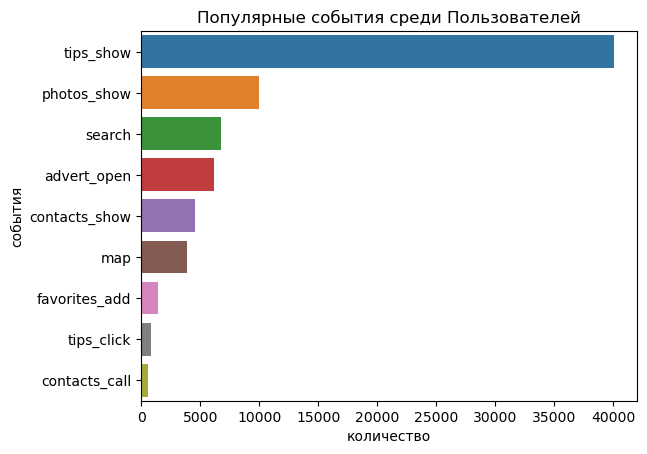

In [30]:
ax = sns.barplot(x='количество', y='события', data=a).set_title("Популярные события среди Пользователей")


Больше всего сессий мы наблюдаем в событиях "показ рекомендованного", "просмотр фото", примерно одинаковое количество событий "поиск" и "открытие объявлений". Из 40055 рекомендованных только на 814 Пользователи кликают. 

#### Среднее время сессий

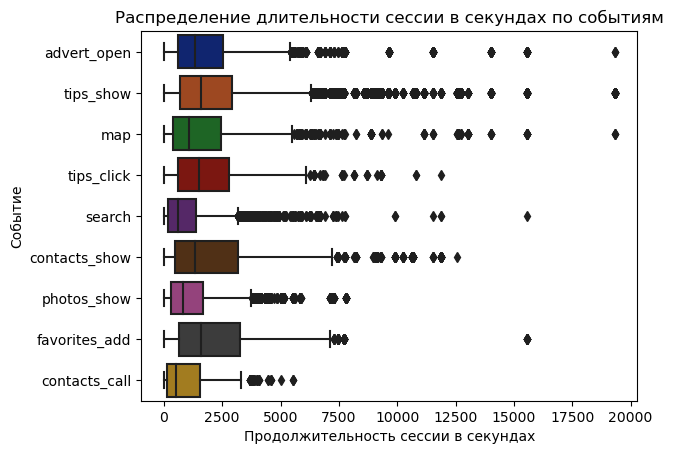

In [31]:
# Построим график "ящик с усами", чтобы посмотреть, как распределяются события по длительности сессий в секундах
ax = sns.boxplot(x='st', y='event_name', data=sessions, palette='dark') 
sns.set(rc={'figure.figsize':(20,10)})
ax.set_ylabel('Событие');
ax.set_xlabel('Продолжительность сессии в секундах');
ax.set_title('Распределение длительности сессии в секундах по событиям');

Большой разброс по длительности сессий. Отфильтруем датасет

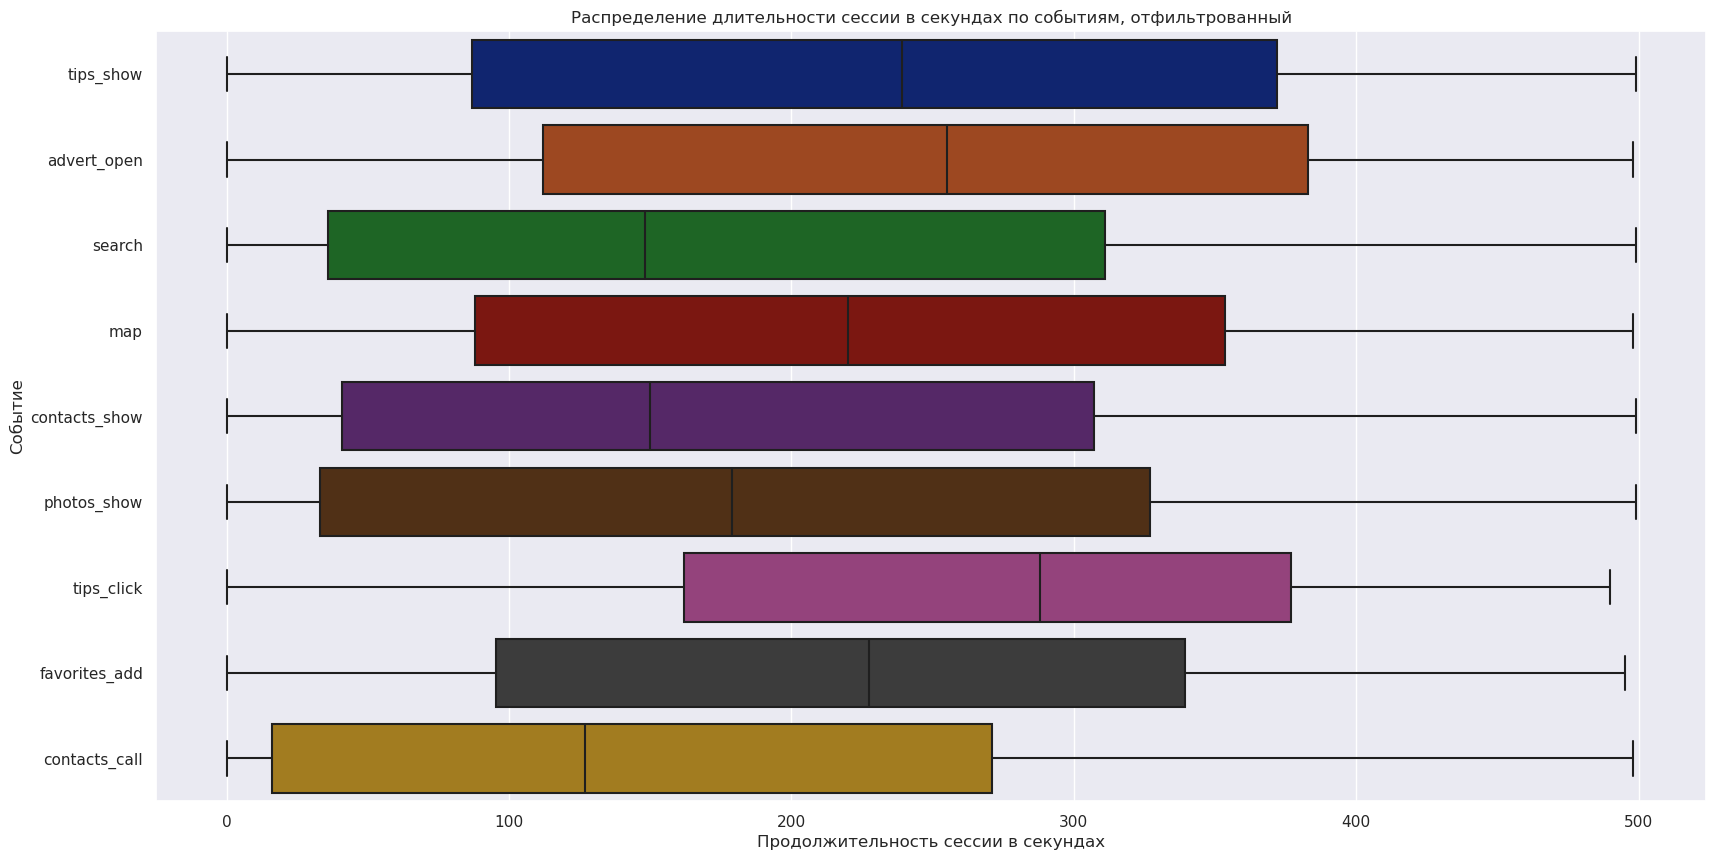

In [32]:
# Построим график "ящик с усами", чтобы посмотреть, как распределяются события по длительности сессий в секундах
ax = sns.boxplot(x='st', y='event_name', data=sessions.query('st < 500'), palette='dark') 
sns.set(rc={'figure.figsize':(20,10)})
ax.set_ylabel('Событие');
ax.set_xlabel('Продолжительность сессии в секундах');
ax.set_title('Распределение длительности сессии в секундах по событиям, отфильтрованный');

Посмотрим, сколько в среднем пользователи проводят времени в Приложении.

In [33]:
sessions.groupby(['session_id'])['st'].median().median()

335.0

В среднем пользователи проводят Приложении почти 6 минут.

#### Среднее количество сессий на Пользователя

In [34]:
sessions.groupby('user_id')['session_id'].count().median()

9.0

В среднем 9 сессий на 1 пользователя. Посмотрим, как распределяется количество сессий среди наших Пользователей.

In [35]:
ses_qty = sessions.groupby('user_id')['session_id'].count().reset_index().sort_values(by='session_id', ascending=False)
ses_qty

,user_id,session_id
3397,cb36854f-570a-41f4-baa8-36680b396370,478
3794,e13f9f32-7ae3-4204-8d60-898db040bcfc,465
2629,9ce63488-758a-481a-bcb5-a02b467e1d84,407
615,21230dd9-2f7f-4b77-a436-43d4d10388e0,400
3162,be1449f6-ca45-4f94-93a7-ea4b079b8f0f,397
...,...,...
1436,55f7dc86-a03b-4cff-adc6-61a23d4ab680,1
2139,800920e6-c654-434c-966e-8e3ebcee0d38,1
3006,b3aa5ec3-6e23-4fcf-bdcc-c0527228fd47,1
1776,6a2e7783-a775-4c7d-adf0-22d1983ce9bd,1


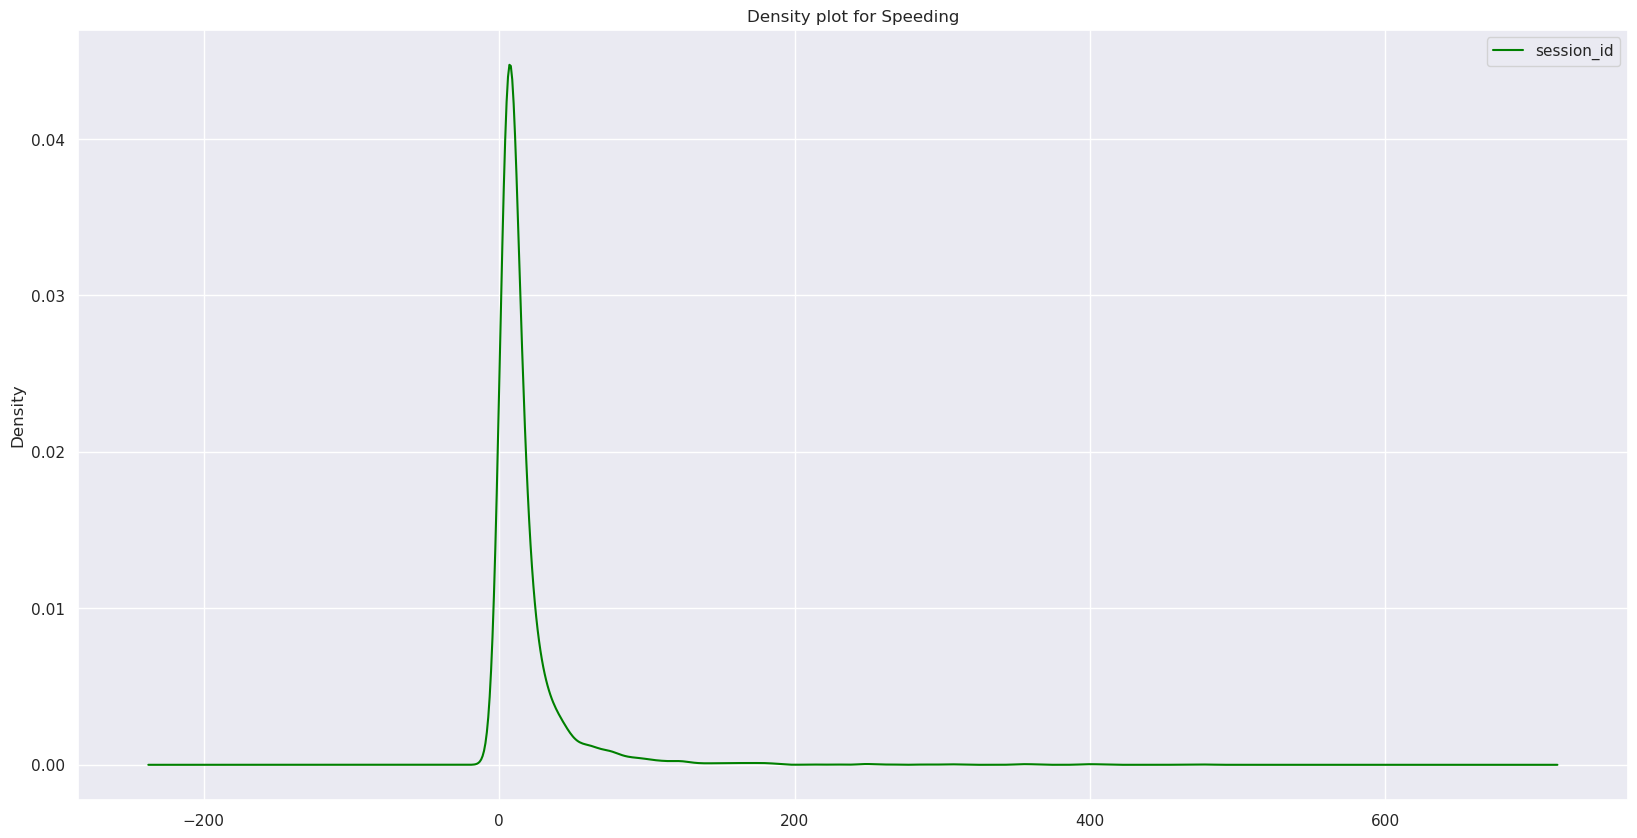

In [36]:
ses_qty.plot.density(color='green')
plt.title('Density plot for Speeding')
plt.show()

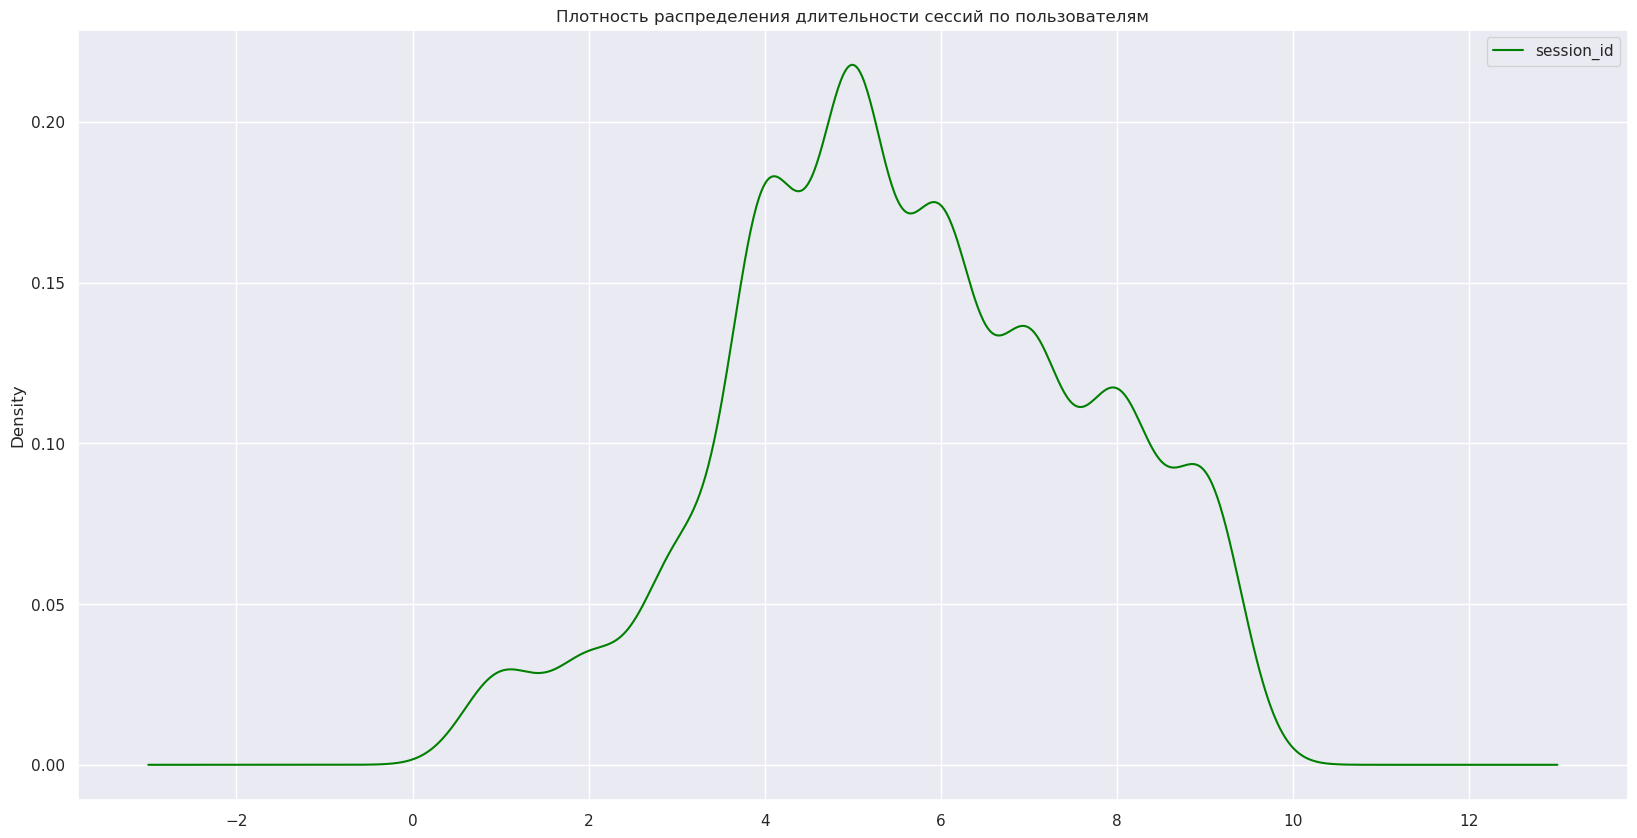

In [37]:
ses_qty.query('session_id <=9').plot.density(color='green')
plt.title('Плотность распределения длительности сессий по пользователям')
plt.show()

Среднее количество сессий 9. Посмотрим, что делают Пользователи с количеством сессий до 5.

In [38]:
non_active = ses_qty.query('session_id <=5')
non_active = list(non_active['user_id'])
len(non_active)

1140

In [39]:
sessions.query('user_id == @non_active').groupby('event_name')['event_name'].count()

event_name
advert_open       171
contacts_call      49
contacts_show     289
favorites_add      78
map               362
photos_show       867
search            948
tips_click         43
tips_show        1748
Name: event_name, dtype: int64

Малое количество сессиий абсолютно не характеризует Пользователей, как малоактивных, т.к. во-первых они могли прийти в Приложение недавно. По характеру совершаемых ими событий можно сказать, что Пользователи, что это обычное поведение, направленное на совершение покупки. У нас 1140 Пользователей (26%) с количеством сессий до 5, которые произвели 6% целевого события (просмотр контакта). Посмотрим, чем занимаются пользователи с колчеством сессий выше 20. 

In [40]:
active = ses_qty.query('session_id <=100')
active = list(active['user_id'])
print('Пользователи с количеством сессий меньше 100:  ', len(active))
active_events = (sessions.query('user_id == @active').groupby('event_name')['event_name'].count())['contacts_show']
per_user = round((active_events / len(active)), 2)
print('Количество целевых действий Пользователей (100 сессий):', active_events)
print('Количество целевых действий на человека с сессиями до 100:', per_user, 'целевое событие на пользователя')

Пользователи с количеством сессий меньше 100:   4217
Количество целевых действий Пользователей (100 сессий): 3335
Количество целевых действий на человека с сессиями до 100: 0.79 целевое событие на пользователя


In [41]:
active_1 = ses_qty.query('session_id > 100')
active_1 = list(active_1['user_id'])
print('Пользователи с количеством сессий больше 100:  ', len(active_1))
active_events_1 = (sessions.query('user_id == @active_1').groupby('event_name')['event_name'].count())['contacts_show']
per_user_1 = round((active_events_1 / len(active_1)), 2)
print('Количество целевых действий Пользователей (более 100 сессий):', active_events_1)
print('Количество целевых действий на человека с сессиями больше 100:', per_user_1, 'целевое событие на пользователя')

Пользователи с количеством сессий больше 100:   76
Количество целевых действий Пользователей (более 100 сессий): 1194
Количество целевых действий на человека с сессиями больше 100: 15.71 целевое событие на пользователя


Пользователи с количеством сессий более 100 являются наиболее продуктивными с точки зрения совершения целевого действия, на 1-го пользователя совершается чуть больше 15 покупок. В то время как Пользователи с количеством сессий до 100, не могут похвастаться и 1 целевым действием на человека. 

#### Пользователи просматривающие/непросматривающие рекомендации

Посмотрим, какие пользователи наиболее эффективны с точки зрения совершения целевого действия: те кто просматривают рекомендованное или те, кто не просматривают.

In [42]:
show = sessions.loc[sessions['event_name'] == 'tips_show', 'user_id'] # Сделаем список юзеров, просматривающих рекомендации
show = pd.DataFrame(show)
show.columns = ['user_id']

show_list = sessions
show_list['show'] = show_list['user_id'].isin(show['user_id'].unique())
show_list
show_events = show_list.query('show == True').groupby('event_name')['event_name'].count()['contacts_show']
print('Количество целевых действий среди, просматривающих рекомендации:', show_events)
show_unique_users = show.nunique()
print('Количество пользователей, просматривающих рекомендации:', show_unique_users)
show_per_user_1 = round((show_events / show_unique_users), 2)
print('Количество событий на пользователя:', show_per_user_1)

Количество целевых действий среди, просматривающих рекомендации: 2827
Количество пользователей, просматривающих рекомендации: user_id    2801
dtype: int64
Количество событий на пользователя: user_id    1.01
dtype: float64


In [43]:
sessions

,event_time,event_name,user_id,source,day_event,session_id,prev,session_time,st,show
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday,1,0,0.0,1123,True
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday,1,2019-10-07 00:00:00,1.0,1123,True
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday,1,2019-10-07 00:00:01,6.0,1123,True
3,2019-10-07 00:01:28,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday,1,2019-10-07 00:00:07,81.0,1123,True
4,2019-10-07 00:01:35,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday,1,2019-10-07 00:01:28,7.0,1123,True
...,...,...,...,...,...,...,...,...,...,...
74192,2019-11-03 23:46:47,map,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday,10368,0,0.0,63,True
74193,2019-11-03 23:46:59,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday,10368,2019-11-03 23:46:47,12.0,63,True
74194,2019-11-03 23:47:01,tips_show,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday,10368,2019-11-03 23:46:59,2.0,63,True
74195,2019-11-03 23:47:47,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday,10368,2019-11-03 23:47:01,46.0,63,True


Теперь, посмотрим, совершают ли целевое действие те, кто не смотрит рекомендации.

In [44]:
no_show_events = show_list.query('show == False').groupby('event_name')['event_name'].count()['contacts_show']
print('Количество целевых действий среди, не просматривающих рекомендации:', no_show_events)

no_show_unique_users = (show_list.query('show == False'))['user_id'].nunique()

print('Количество пользователей, не просматривающих рекомендации:', no_show_unique_users)
no_show_per_user_1 = round((no_show_events / no_show_unique_users), 2)
print('Количество событий на пользователя:', no_show_per_user_1)

Количество целевых действий среди, не просматривающих рекомендации: 1702
Количество пользователей, не просматривающих рекомендации: 1492
Количество событий на пользователя: 1.14


In [45]:
sessions

,event_time,event_name,user_id,source,day_event,session_id,prev,session_time,st,show
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday,1,0,0.0,1123,True
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday,1,2019-10-07 00:00:00,1.0,1123,True
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday,1,2019-10-07 00:00:01,6.0,1123,True
3,2019-10-07 00:01:28,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday,1,2019-10-07 00:00:07,81.0,1123,True
4,2019-10-07 00:01:35,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday,1,2019-10-07 00:01:28,7.0,1123,True
...,...,...,...,...,...,...,...,...,...,...
74192,2019-11-03 23:46:47,map,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday,10368,0,0.0,63,True
74193,2019-11-03 23:46:59,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday,10368,2019-11-03 23:46:47,12.0,63,True
74194,2019-11-03 23:47:01,tips_show,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday,10368,2019-11-03 23:46:59,2.0,63,True
74195,2019-11-03 23:47:47,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday,10368,2019-11-03 23:47:01,46.0,63,True


Количество целевых событий на Пользователя среди непросматривающих рекомендаций выше, чем среди просматривающих. Есть вопросы к алгоритмам рекомендаций. Раз пользователи их не смотрят, но при этом совершают покупки, или Пользователи предпочитают сами искать , а не просматривать рекомендованное, или рекомендации не очень соответсвуют критериям поиска Пользователя.
Ранее мы уже обращали внимание на маленькую коверсию из просматривающих в кликающих: на 40055 просматривающих 814 кликающих.

#### Пользователи, кликающие и не кликающие на рекомендации

Теперь посмотрим, отличаются ли пользователи по кол-ву целевых действий в зависимости от того кликают ли они по рекомендациям.

In [46]:
click = sessions.loc[sessions['event_name'] == 'tips_click', 'user_id'] # Сделаем список юзеров, просматривающих рекомендации
click = pd.DataFrame(click)
click.columns = ['user_id']

click_list = sessions
click_list['click'] = click_list['user_id'].isin(click['user_id'].unique())
click_list
click_events = click_list.query('click == True').groupby('event_name')['event_name'].count()['contacts_show']
print('Количество целевых действий среди, кликающих рекомендации:', click_events)
click_unique_users = click.nunique()
print('Количество пользователей, кликающих рекомендации:', click_unique_users)
click_per_user_1 = round((click_events / click_unique_users), 2)
print('Количество событий на пользователя:', click_per_user_1)

Количество целевых действий среди, кликающих рекомендации: 869
Количество пользователей, кликающих рекомендации: user_id    322
dtype: int64
Количество событий на пользователя: user_id    2.7
dtype: float64


In [47]:
no_click_events = click_list.query('click == False').groupby('event_name')['event_name'].count()['contacts_show']
print('Количество целевых действий среди, не кликающих рекомендации:', no_click_events)

no_click_unique_users = (click_list.query('click == False'))['user_id'].nunique()

print('Количество пользователей, не кликающих рекомендации:', no_click_unique_users)
no_click_per_user_1 = round((no_click_events / no_click_unique_users), 2)
print('Количество событий на пользователя:', no_click_per_user_1)

Количество целевых действий среди, не кликающих рекомендации: 3660
Количество пользователей, не кликающих рекомендации: 3971
Количество событий на пользователя: 0.92


Есть существенная разница между количеством целевых действий на юзера, 0,92 целевого события в случае с группой пользователей, не кликающих на рекомендацию. И 2,7 целевых действия на кликающих пользователей. 

#### Пользователи, добавляющие в избранное и не добавляющие в избранное

In [48]:
fav = sessions.loc[sessions['event_name'] == 'favorites_add', 'user_id'] # Сделаем список юзеров, просматривающих рекомендации
fav = pd.DataFrame(fav)
fav.columns = ['user_id']

fav_list = sessions
fav_list['fav'] = fav_list['user_id'].isin(fav['user_id'].unique())
fav_list
fav_events = fav_list.query('fav == True').groupby('event_name')['event_name'].count()['contacts_show']
print('Количество целевых действий среди, добавляющих в избранное:', fav_events)
fav_unique_users = fav.nunique()
print('Количество пользователей, пдобавляющих в избранное:', fav_unique_users)
fav_per_user_1 = round((fav_events / fav_unique_users), 2)
print('Количество событий на пользователя:', fav_per_user_1)

Количество целевых действий среди, добавляющих в избранное: 783
Количество пользователей, пдобавляющих в избранное: user_id    351
dtype: int64
Количество событий на пользователя: user_id    2.23
dtype: float64


In [49]:
no_fav_events = fav_list.query('fav == False').groupby('event_name')['event_name'].count()['contacts_show']
print('Количество целевых действий среди, не добавляющих в избранное:', no_fav_events)

no_fav_unique_users = (fav_list.query('fav == False'))['user_id'].nunique()

print('Количество пользователей, не добавляющих в избранное:', no_fav_unique_users)
no_fav_per_user_1 = round((no_fav_events / no_fav_unique_users), 2)
print('Количество событий на пользователя:', no_fav_per_user_1)

Количество целевых действий среди, не добавляющих в избранное: 3746
Количество пользователей, не добавляющих в избранное: 3942
Количество событий на пользователя: 0.95


С точки зрения совершения целевого действия наиболее интересна группа Пользователей, добавляющая избранное. Они совершают в 2 раза больше целевых действий.

По результатам анализа разных групп Пользователей, можно сделать вывод, что наиболее интересная группа Пользователей с точки зрения совершения целевого действия та группа, которая просматривает и кликает на рекомендованное, а также пользуется избранное. Возможно часть Пользователей, не совершающая указанные действия, еще недавно в ПРиложении и не успела совершить эти действия, возможно по этой же причине, они еще не успели совершить целевые действия. Необходимо мотивировать Пользователей на добавление в избранное и просмотр рекомендаций. Возможно необходимо улучшить алгорит предложки, чтобы стимулировать клики. Так как кликающие Пользователи совершают больше целевых действий. 

### Частота действий пользователя

Оценим пользовательскую активность, посмотрим количество уникальных пользователей за период времени (день и неделю)

In [50]:
freq = profiles
freq['session_week'] = freq['first_ts'].dt.isocalendar().week
freq['date'] = freq['first_ts'].dt.date
dau_total = (
    freq.groupby('date').agg({'user_id': 'nunique'}).mean()
)

wau_total = (
    freq.groupby(['session_week'])
    .agg({'user_id': 'nunique'})
    .mean()
)
print(int(dau_total))
print(int(wau_total))
freq

153
1073


,user_id,first_ts,source,dt,day,session_week,date
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:46,other,2019-10-07,Monday,41,2019-10-07
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:34,yandex,2019-10-19,Saturday,42,2019-10-19
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35,yandex,2019-11-01,Friday,44,2019-11-01
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:06,google,2019-10-18,Friday,42,2019-10-18
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41,yandex,2019-10-25,Friday,43,2019-10-25
...,...,...,...,...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2019-10-13 16:11:27,yandex,2019-10-13,Sunday,41,2019-10-13
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07 20:32:50,yandex,2019-10-07,Monday,41,2019-10-07
4290,ffcf50d9-293c-4254-8243-4890b030b238,2019-10-23 11:51:35,google,2019-10-23,Wednesday,43,2019-10-23
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-21 16:39:34,yandex,2019-10-21,Monday,43,2019-10-21


Каждый день в Приложение приходит 153 новых пользователя, и 1073 в неделю. Посмотрим, приходит ли больше новых пользователей в зависимости от дня недели.

In [51]:
freq.pivot_table(index='day', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)

,user_id
day,
Monday,708
Wednesday,665
Tuesday,645
Thursday,638
Sunday,566
Friday,551
Saturday,520


Пик привлечения новых пользователей - Понедельник и Четверг, Меньше всего - Суббота и Пятница. 

Посмотрим, какие действия чаще производятся в какие дни недели.

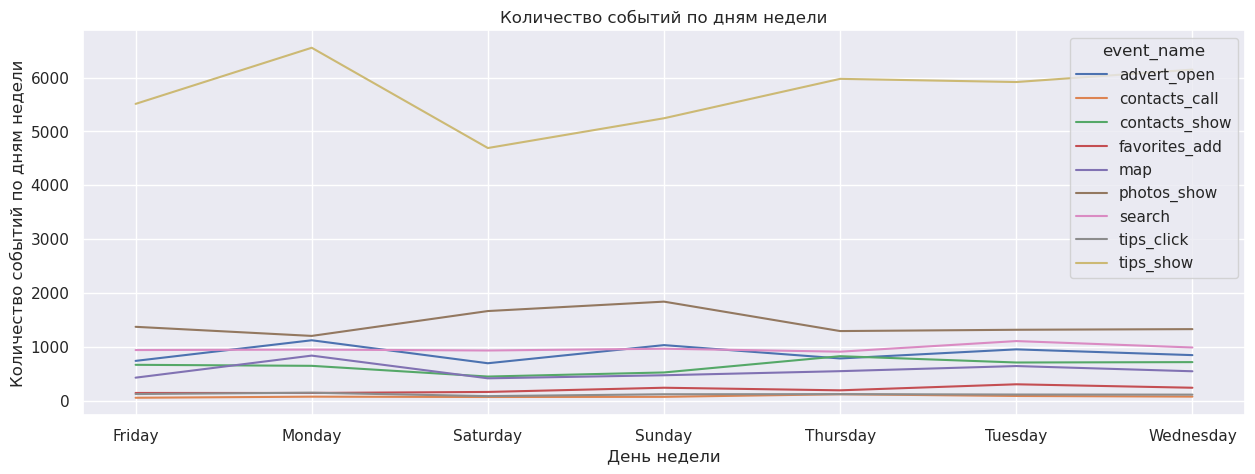

In [52]:
events = sessions.pivot_table(index='day_event', columns='event_name', values='user_id', aggfunc='count')
events
sessions.pivot_table(
    index='day_event',  # даты первых посещений
    columns='event_name',
    values='user_id',  # ID пользователей
    aggfunc='count'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)
plt.ylabel('Количество событий по дням недели')
plt.xlabel('День недели')
plt.title('Количество событий по дням недели')
plt.show()

Мы уже выяснили, что самое популярное действие - это просмотр рекомендаций. Больше всего пользователи смотрят рекомендации в Понедельник и Среду, меньше всего Пятницу и Вторник. Кликают на рекомендации больше также в Понедельник, Четверг и в Пятницу, в подтверждение нашей теории, что люди стараются на выходных совершить покупку, вероятно, поэтому склонны кликать на рекомендации чаще. Просмотр фото вцелом достаточно любимое занятие у людей,  Пользователи нашего приложения чаще просматривают фото в Субботу и в Воскресенье. Меньше всего фото смотрят в Понедельник. Объявления открывают чаще всего в Понедельник и Воскресенье. Просматривают контакты в Четверг и Среду.

### Конверсия в целевое действие (просмотр контактов)

Целевым действием считаем просмотр контактов, так как, как правило, люди смотрят контакты, чтобы связаться с человеком. В просмотр контактов можно попасть разными способами: мы можем открыть объявление и потом пройти в контакты, мы можем пройти в контакты из избранного, из карт или фотографий, из поиска и после того, как кликнули на рекомендацию. Посчитаем конверсию в целевое действие.  

In [53]:
show_contacts = sessions.query('event_name == "contacts_show"')
conversion = round((show_contacts['user_id'].nunique() / sessions['user_id'].nunique() * 100),2)
conversion

22.85

Итак 23% от общего количества (открывших объявление, просмотревших фото, карты, рекомендованное и т.д.) совершили целевое действие (посмотрели контакты).

### Промежуточный вывод

Мы проанализировали поведение Пользователей Приложения "Ненужные вещи". 

Самые популярные события у Пользователей в первые несколько дней: совершение звонков, просмотр контактов и просмотр фотографий. На 10-дневном лайфтайме очевидно, что Пользователи больше всего смотрят фотографии в течение всех 10 дней. Пользователи активны в добавлении в избранное и в поиске. Пользователи активны в кликах на рекомендации через день, что вероятно, говорит о периодическом обновлении новых рекомендаций.

Необходимо учитывать специфику интересов пользователей в первые несколько дней использования Приложения для увеличения вовлеченности Пользователя. 

Среднее время, проведенное в Приложении Пользователями - 6 минут.
При этом есть большое количество очень коротких и даже нулевых сессии, которые являются либо характерной
техническая часть просмотра контента приложения, или паттерном поведения пользователя (например пролистывание фото, без клика). У нас также есть экстремально длительные сессии свыше 25 часов, что говорит о том, что Пользователи не выходят из Приложения на своих устройствах.

Среднее количество сессий на Пользователя - 9 штук. Но у нас также имеются Пользователи с количеством сессий 100 и выше. С точки зрения совершения целевого действия Пользователи с количеством сессиий больше 100 более эффективны. 

Самые популярные события у Пользователей Приложения: просмотр рекомендованного, фото, поиск, открытие объявлений.
Самые непопулярные: звонки, клики по рекомендациям, добавление в избранное.
Есть проблема в том, что просмотр рекомендаций экстремально плохо конвертируется в клики, а также мало событий добавления в избранное.

Приложение "Ненужные вещи" имеет определенный функционал, направленный на стимулирование Пользователей к совершению целевого действия, в нашем случае, это просмотр контактов, как действие, предшествующее звонку и совершению покупки. Мы разделили Пользователей на группы использующие и не использующие функционал Приложения и сравнили,  количество целевых действий на одного Пользователя каждой группы.

Мы разделили пользователей на следующие группы:

**Просматривающие рекомендации/непросматривающие**
Количество целевых событий на Пользователя среди непросматривающих рекомендаций выше, чем среди просматривающих. Есть вопросы к алгоритмам рекомендаций. Раз пользователи их не смотрят, но при этом совершают покупки, или Пользователи предпочитают сами искать , а не просматривать рекомендованное, или рекомендации не очень соответсвуют критериям поиска Пользователя. Ранее мы уже обращали внимание на маленькую коверсию из просматривающих в кликающих: на 40055 просматривающих 814 кликающих.

**Пользователи кликающие рекомендации/некликающие**
Есть существенная разница между количеством целевых действий на юзера, 0,92 целевого события в случае с группой пользователей, не кликающих на рекомендацию. И 2,7 целевых действия на кликающих пользователей.

**Пользователи, добавляющие в избранное/недобавляющие**
С точки зрения совершения целевого действия наиболее интересна группа Пользователей, добавляющая избранное. Они совершают в 2 раза больше целевых действий.

## Сегментация

Выше в нашем исследовании мы пришли к выводу, что Пользователи, использующие и не использующие разный функционал Приложения, демонстрируют разное количество целевых действий на Пользователя. Сейчас посмотрим, как отличаются удержание и конверсия. Разделение на группы по совершению/несовершению действий покажет нам картину, насколько использование или не использование функционала Приложения влияет на удержание и конверсию Пользователей. Мы также увидим, насколько хорошо работают функции Приложения и выполняют ли они свою задачу по удержанию и главное по конвертации Пользователей в Пользователей, приносящих прибыль. Наше предположение заключается в том, что Пользователи, которые просматривают рекомендации/кликают на рекомендации/добавляют в избранное являются более вовлеченными и демонстрируют лучший показатель удержания и конверсии сравнительно с группами Пользователей, не совершающиъ указанный действия.

In [54]:
sessions

,event_time,event_name,user_id,source,day_event,session_id,prev,session_time,st,show,click,fav
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday,1,0,0.0,1123,True,False,False
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday,1,2019-10-07 00:00:00,1.0,1123,True,False,False
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday,1,2019-10-07 00:00:01,6.0,1123,True,False,False
3,2019-10-07 00:01:28,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday,1,2019-10-07 00:00:07,81.0,1123,True,False,False
4,2019-10-07 00:01:35,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,Monday,1,2019-10-07 00:01:28,7.0,1123,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
74192,2019-11-03 23:46:47,map,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday,10368,0,0.0,63,True,False,False
74193,2019-11-03 23:46:59,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday,10368,2019-11-03 23:46:47,12.0,63,True,False,False
74194,2019-11-03 23:47:01,tips_show,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday,10368,2019-11-03 23:46:59,2.0,63,True,False,False
74195,2019-11-03 23:47:47,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday,10368,2019-11-03 23:47:01,46.0,63,True,False,False


### Удержание 

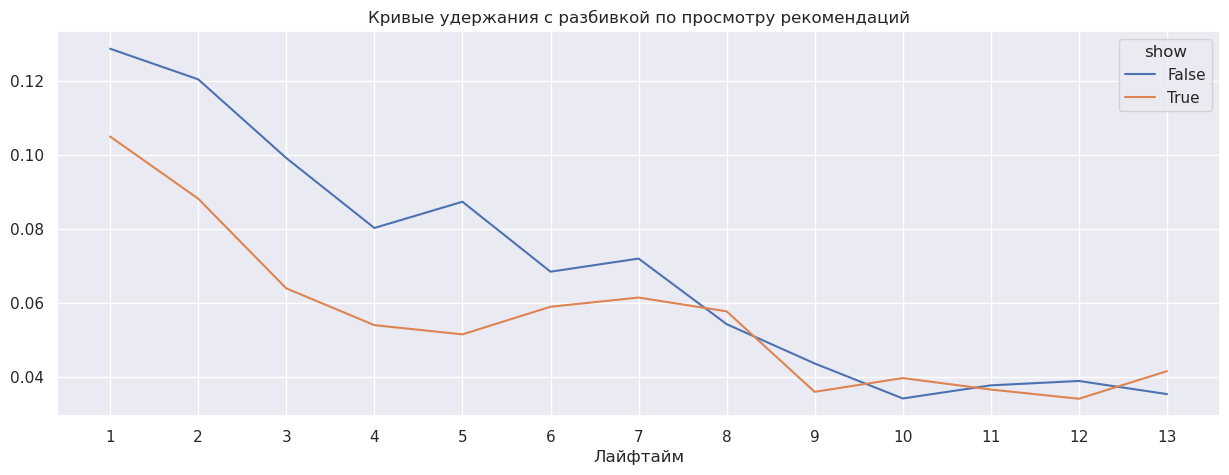

In [55]:
# рассчитываем удержание с учётом совершения просмотра рекомендаций

retention_raw, retention = get_retention(
    profiles, sessions, datetime(2019, 11, 3).date(), 14, dimensions=['show']
)  # передаём параметру dimensions столбец show

report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по просмотру рекомендаций')
plt.show()

Удержание Пользователей, не просматривающих рекомендации в первую неделю выше, чем у Пользователей, просматривающих рекомендации. После 8-го дня удержание обеих групп меняется в разных напрвлениях.

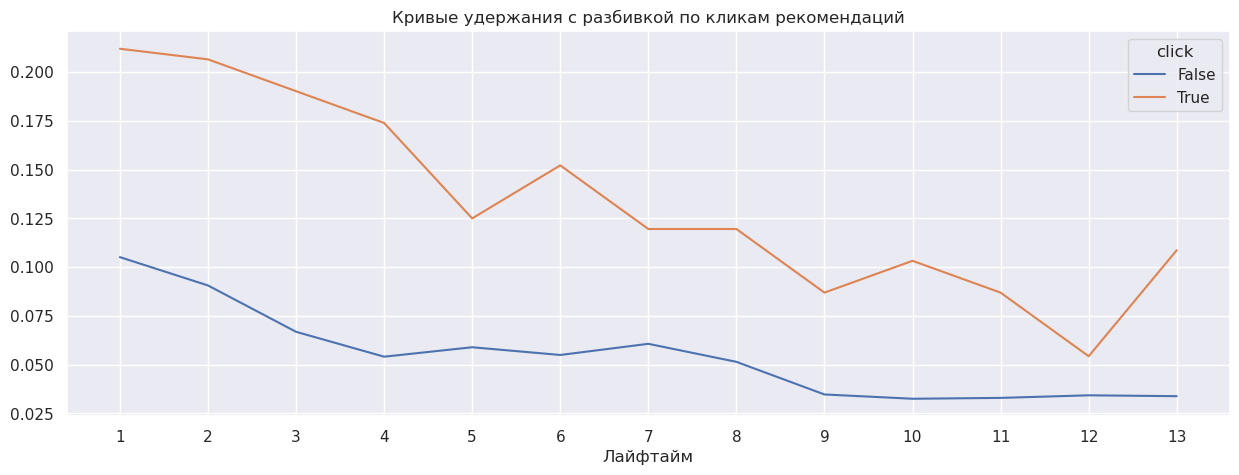

In [56]:
# рассчитываем удержание с учётом клика на рекомендации

retention_raw, retention = get_retention(
    profiles, sessions, datetime(2019, 11, 3).date(), 14, dimensions=['click']
)  # передаём параметру dimensions столбец click

report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по кликам рекомендаций')
plt.show()

Удержание Пользователей, кликающих по рекомендациям значительно лучше, чем у некликающей группы. Вероятно, Пользователи, увидевшие в рекомендациях подходящий товар и кликнувшие на него, видят пользу от Приложения и не теряют надежду приобрести что-то стоящее.

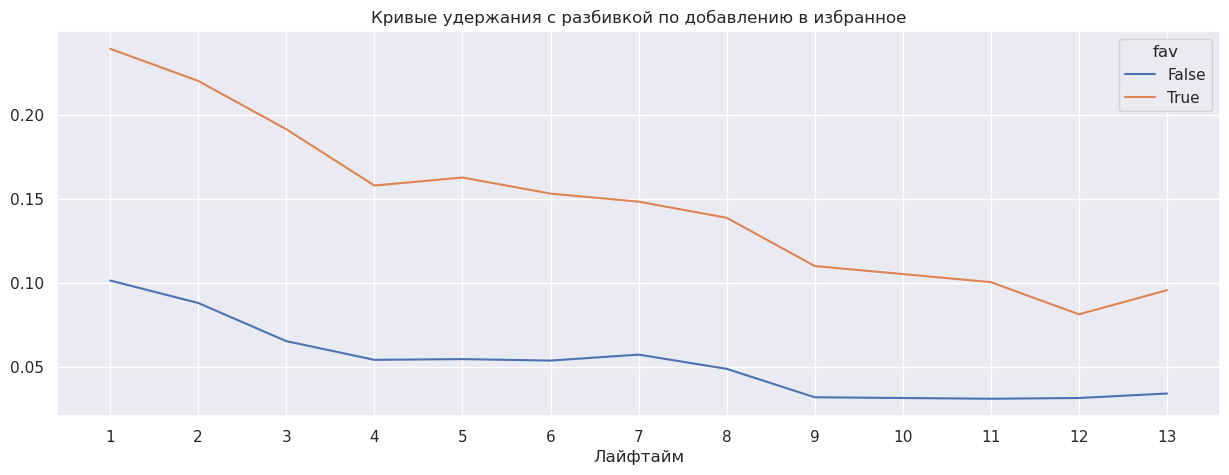

In [57]:
# рассчитываем удержание с учётом добавления в избранное

retention_raw, retention = get_retention(
    profiles, sessions, datetime(2019, 11, 3).date(), 14, dimensions=['fav']
)  # передаём параметру dimensions столбец fav

report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по добавлению в избранное')
plt.show()

Удержание Пользователей, не добавляющих в избранное значительно ниже. 

Пользователи, которые используют дополнительные функции Приложения (добавление в избранное, клик на рекомендацию) вероятно видят полезность Приложения и удерживаются лучше. Чего нельзя сказать о Пользователях, просматривающих рекомендации. Непросматривающие удерживаются лучше. Вероятно группа пользователей непросматривающая рекомендации, не видит полезности или не может использовать приложение с пользой для себя. Проблема может быть в алгоритме рекомендации или в неудобстве просмотра. 

### Конверсия по сегментам

In [58]:
show_contacts_show_tips = sessions.query('event_name == "contacts_show" and show ==True')
conversion_tips_show = round((show_contacts_show_tips['user_id'].nunique() / sessions.query('show == True')['user_id'].nunique() * 100),2)
print('Конверсия пользователей, просматривающих рекомендации:', conversion_tips_show)

Конверсия пользователей, просматривающих рекомендации: 18.42


In [59]:
show_contacts_no_show_tips = sessions.query('event_name == "contacts_show" and show == False')
conversion_tips_no_show = round((show_contacts_no_show_tips['user_id'].nunique() / sessions.query('show == False')['user_id'].nunique() * 100),2)
print('Конверсия пользователей, не просматривающих рекомендации:', conversion_tips_no_show)

Конверсия пользователей, не просматривающих рекомендации: 31.17


Конверсия пользователей, просматривающих рекомендации ниже, чем у непросматривающих. Это коррелирует с тем, что непросматривающие удерживаются лучше, чем просматривающие.

In [60]:
show_contacts_click_tips = sessions.query('event_name == "contacts_show" and click ==True')
conversion_tips_click = round((show_contacts_click_tips['user_id'].nunique() / sessions.query('click == True')['user_id'].nunique() * 100),2)
print('Конверсия пользователей, кликающих рекомендации:', conversion_tips_click)

Конверсия пользователей, кликающих рекомендации: 31.06


In [61]:
show_contacts_no_click_tips = sessions.query('event_name == "contacts_show" and click == False')
conversion_tips_no_click = round((show_contacts_no_click_tips['user_id'].nunique() / sessions.query('show == False')['user_id'].nunique() * 100),2)
print('Конверсия пользователей, не кликающих рекомендации:', conversion_tips_no_click)

Конверсия пользователей, не кликающих рекомендации: 59.05


Конверсия Пользователей, не кликающих рекомендации в 2 раза выше.

In [62]:
show_contacts_fav = sessions.query('event_name == "contacts_show" and fav ==True')
conversion_fav = round((show_contacts_fav['user_id'].nunique() / sessions.query('fav == True')['user_id'].nunique() * 100),2)
print('Конверсия пользователей, добавляющих в избранное:', conversion_fav)

Конверсия пользователей, добавляющих в избранное: 38.75


In [63]:
show_contacts_no_fav = sessions.query('event_name == "contacts_show" and fav == False')
conversion_no_fav = round((show_contacts_no_fav['user_id'].nunique() / sessions.query('fav == False')['user_id'].nunique() * 100),2)
print('Конверсия пользователей, не добавляющих в избранное:', conversion_no_fav)

Конверсия пользователей, не добавляющих в избранное: 21.44


Конверсия Пользователей, не добавляющих в избранное значительно ниже.

In [64]:
evn = np.array(['Просматривают рекомендации', 'Не просматривают рекомендации', 'Кликают на рекомендации',
       'Не кликают на рекомендации', 'Добавляют в избранное', 'Не добавляют в избранное'])
cnv = np.array(['18.42%', '31.17%', '31.06%', '59.05%', '38.75%', '21.44%'])
table = pd.DataFrame({'Группа': evn, "Конверсия": cnv})
table = table.transpose()
table

,0,1,2,3,4,5
Группа,Просматривают рекомендации,Не просматривают рекомендации,Кликают на рекомендации,Не кликают на рекомендации,Добавляют в избранное,Не добавляют в избранное
Конверсия,18.42%,31.17%,31.06%,59.05%,38.75%,21.44%


### Промежуточный вывод

Мы проанализировали удержание и конверсий по группам Пользователей, использующих и неиспользующих функционал Приложения.

**Целевая группа:**

Пользователи, просматривающие рекомендации, так как конверсия Пользователей, непросматривающих рекомендации почти в 2 раза выше, чем у предыдущих.
Это говорит о том, что есть проблема с просмотром или заинтересованностью предложенным. Улучшив алгоритм подбора или показа рекомендаций, мы увеличим количество покупок.

Пользователи, кликающие рекомендации. Их конверсия в полтора раза меньше, чем у не кликающих, но они демонстрируют более лучшее удержание. Здесь есть возможность для развития Приложения. При правильном алгоритме подбора и удобстве
клики по рекоменадциям помогают Пользователям совершить покупку. 

Пользователи, не добавляющие в избранное. У добавляющих выше конверсия. Люди возвращаются к избранному для совершения покупки.
Если не добавляющих мотивировать на использование этой функции есть возможность увеличить конверсию. Недобавляющие демонстрируют более худшее удержание,
его можно улучшить.

**Смежная:**

Пользователи, непросматривающие рекомендации. 
Пользователи,  не кликающие по рекомендациям, демонстрируют худшее удержание с сравнительно с кликающими.
Пользователи, добавляющие в избранное, демонстрирую неплохое удержание с ростом на 12-й день лайфтайма.

## Проверка гипотез

### Гипотеза 1

Гипотеза 0: Пользователи, установившие приложение по ссылке из yandex и пользователи, установившие приложение по ссылке из google, демонстрируют одинаковую конверсию в просмотры контактов.
Альтернативная гипотеза: Пользователи, установившие приложение по ссылке из yandex и пользователи, установившие приложение по ссылке из google, демонстрируют разную конверсию в просмотры контактов.

In [65]:
yandex = sessions.query('source == "yandex"')
google = sessions.query('source == "google"')
google

,event_time,event_name,user_id,source,day_event,session_id,prev,session_time,st,show,click,fav
225,2019-10-07 00:09:34,tips_show,f32e1e2a-3027-4693-b793-b7b3ff274439,google,Monday,16,0,0.0,2448,True,False,False
226,2019-10-07 00:11:49,tips_show,f32e1e2a-3027-4693-b793-b7b3ff274439,google,Monday,16,2019-10-07 00:09:34,135.0,2448,True,False,False
227,2019-10-07 00:13:34,tips_show,f32e1e2a-3027-4693-b793-b7b3ff274439,google,Monday,16,2019-10-07 00:11:49,105.0,2448,True,False,False
228,2019-10-07 00:13:45,tips_show,f32e1e2a-3027-4693-b793-b7b3ff274439,google,Monday,16,2019-10-07 00:13:34,11.0,2448,True,False,False
229,2019-10-07 00:15:03,tips_show,f32e1e2a-3027-4693-b793-b7b3ff274439,google,Monday,16,2019-10-07 00:13:45,78.0,2448,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
74192,2019-11-03 23:46:47,map,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday,10368,0,0.0,63,True,False,False
74193,2019-11-03 23:46:59,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday,10368,2019-11-03 23:46:47,12.0,63,True,False,False
74194,2019-11-03 23:47:01,tips_show,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday,10368,2019-11-03 23:46:59,2.0,63,True,False,False
74195,2019-11-03 23:47:47,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,Sunday,10368,2019-11-03 23:47:01,46.0,63,True,False,False


In [66]:
alpha = .05 # критический уровень статистической значимости

yandex_trials = yandex.user_id.nunique()
google_trials = google.user_id.nunique()

yandex_successes = sessions.query('event_name == "contacts_show" and source == "yandex"')['user_id'].nunique()
google_successes = sessions.query('event_name == "contacts_show" and source == "google"')['user_id'].nunique()


# пропорция успехов в первой группе:
p1 = yandex_successes/yandex_trials

# пропорция успехов во второй группе:
p2 = google_successes/google_trials

print(yandex_successes, google_successes, yandex_trials, google_trials)

# пропорция успехов в комбинированном датасете:
p_combined = (yandex_successes + google_successes) / (yandex_trials + google_trials)

# разница пропорций в датасетах
difference = p1 - p2 
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * yandex_trials + google_trials)

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

478 275 1934 1129
p-значение:  0.9999259860260736
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Пользователи, установившие приложение по ссылке из yandex и пользователи, установившие приложение по ссылке из google, демонстрируют одинаковую конверсию в просмотры контактов.

### Гипотеза 2

Гипотеза 0: Доли покупок (contacts_show) среди пользователей, регулярно просматривающих рекомендованное и непросматривающих одинаковые.

Альтернативная гипотеза: Доли покупок (contacts_show) среди пользователей, регулярно просматривающих рекомендованное и непросматривающих разные. 

In [67]:
alpha = .05 # критический уровень статистической значимости

show_trials = sessions.query('show == True').user_id.nunique()
no_show_trials = sessions.query('show == False').user_id.nunique()

show_successes = sessions.query('event_name == "contacts_show" and show == True')['user_id'].nunique()
no_show_successes = sessions.query('event_name == "contacts_show" and show == False')['user_id'].nunique()

# пропорция успехов в первой группе:
p1 = show_successes/show_trials

# пропорция успехов во второй группе:
p2 = no_show_successes/no_show_trials

print(show_successes, no_show_successes, show_trials, no_show_trials)

# пропорция успехов в комбинированном датасете:
p_combined = (show_successes + no_show_successes) / (show_trials + no_show_trials)

# разница пропорций в датасетах
difference = p1 - p2 
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * show_trials + no_show_trials)

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

516 465 2801 1492
p-значение:  0.9977181594665785
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Доли покупок (contacts_show) среди пользователей, регулярно просматривающих рекомендованное и непросматривающих одинаковые.

# Вывод

Мы проанализировали поведение Пользователей Приложения "Ненужные вещи".

Самые популярные события у Пользователей в первые несколько дней: совершение звонков, просмотр контактов и просмотр фотографий. На 10-дневном лайфтайме очевидно, что Пользователи больше всего смотрят фотографии в течение всех 10 дней. Пользователи активны в добавлении в избранное и в поиске. Пользователи активны в кликах на рекомендации через день, что вероятно, говорит о периодическом обновлении новых рекомендаций.

Необходимо учитывать специфику интересов пользователей в первые несколько дней использования Приложения для увеличения вовлеченности Пользователя.

Среднее время, проведенное в Приложении Пользователями - 6 минут. При этом есть большое количество очень коротких и даже нулевых сессии, которые являются либо характерной техническая часть просмотра контента приложения, или паттерном поведения пользователя (например пролистывание фото, без клика). У нас также есть экстремально длительные сессии свыше 25 часов, что говорит о том, что Пользователи не выходят из Приложения на своих устройствах.

Среднее количество сессий на Пользователя - 9 штук. Но у нас также имеются Пользователи с количеством сессий 100 и выше. С точки зрения совершения целевого действия Пользователи с количеством сессиий больше 100 более эффективны.

Самые популярные события у Пользователей Приложения: просмотр рекомендованного, фото, поиск, открытие объявлений. Самые непопулярные: звонки, клики по рекомендациям, добавление в избранное. Есть проблема в том, что просмотр рекомендаций экстремально плохо конвертируется в клики, а также мало событий добавления в избранное.

**Целевая группа:**

Пользователи, просматривающие рекомендации, так как конверсия Пользователей, непросматривающих рекомендации почти в 2 раза выше, чем у предыдущих.
Это говорит о том, что есть проблема с просмотром или заинтересованностью предложенным. Улучшив алгоритм подбора или показа рекомендаций, мы увеличим количество покупок.

Пользователи, кликающие рекомендации. Их конверсия в полтора раза меньше, чем у не кликающих, но они демонстрируют более лучшее удержание. Здесь есть возможность для развития Приложения. При правильном алгоритме подбора и удобстве
клики по рекоменадциям помогают Пользователям совершить покупку. 

Пользователи, не добавляющие в избранное. У добавляющих выше конверсия. Люди возвращаются к избранному для совершения покупки.
Если не добавляющих мотивировать на использование этой функции есть возможность увеличить конверсию. Недобавляющие демонстрируют более худшее удержание,
его можно улучшить.

**Смежная:**

Пользователи, непросматривающие рекомендации. 
Пользователи,  не кликающие по рекомендациям, демонстрируют худшее удержание с сравнительно с кликающими.
Пользователи, добавляющие в избранное, демонстрирую неплохое удержание с ростом на 12-й день лайфтайма.

Мы также проверили 2 гипотезы о равенстве долей.
Пользователи, установившие приложение по ссылке из yandex и пользователи, установившие приложение по ссылке из google, продемонстрировали одинаковую конверсию в просмотры контактов.
Доли покупок (contacts_show) среди пользователей, регулярно просматривающих рекомендованное и непросматривающих одинаковые.

Рекомендации:

1. При планировании рекламных акций и рассылок учитывать пики активности Пользователей (Понедельник и Четверг),
дни с наименьшей активностью (Пятница, Суббота, Воскресенье)
2. Улучшить алгоритм рекомендаций.
